<a href="https://colab.research.google.com/github/grbarbosa3/Machine_learning/blob/master/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style() #Configurar o estilo de plot

df = pd.read_csv("/content/heart-disease-clean.csv")

df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [ ]:
print("Tamanho do dataset:\n",df.shape)

Tamanho do dataset:
 (303, 14)


## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Neste caso de regresssão logística, é necessario utilizar uma padronização no passo 3.2.
Ou seja, colocar os numeros todos numa escala de desvio padrao com média zero

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1 Instanciar o modelo
model = LogisticRegression() 

# 2 Separar feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']                

# 3.1 Separar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y)   

# 3.2 Padronizando os dados de treino
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)

# 4 Fazer fit do modelo instanciado
model.fit(X_train, y_train)

# 5 Fazer as prévias em cima de novos dados
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.82      0.82      0.82        34

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



Modelo de `predict_proba` mostra em porcentagem os valores, sendo o primeiro número a probabilidade de ser valor igual a zero e o segundo número, a probabilidade de ter um valor igual a 1.

In [ ]:
y_proba = model.predict_proba(X_test)

In [ ]:
y_pred[0:5]

array([1, 0, 0, 0, 0])

In [ ]:
y_proba[0:5]

array([[0.11402893, 0.88597107],
       [0.9619895 , 0.0380105 ],
       [0.85126131, 0.14873869],
       [0.99195975, 0.00804025],
       [0.95637003, 0.04362997]])

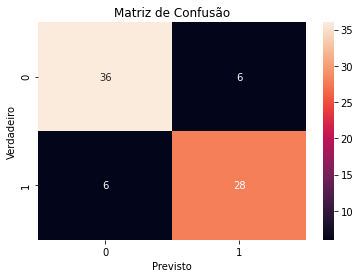

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.show()